In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:\Data_analytics_new\MLOPS\Diamond_Price_Prediction\experiments\Diamond Price Prediction.csv")

In [3]:
df.shape

(53940, 10)

In [4]:
df.columns

Index(['Carat(Weight of Daimond)', 'Cut(Quality)', 'Color', 'Clarity', 'Depth',
       'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')

In [5]:
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Data Validation

 1. Carat(Weight of Diamond) -> Weight of Diamond.
 2. Cut(Quality) -> Quality of cut(Fair, Good, Very Good, Premium, Ideal).
 3. Color -> Diamond Color(from J -> 'worst' to D -> 'Best').
 4. Clarity -> Measurement of Transparency(how clear the Diamond is) 
                  Sequence of clarity ( I1 (worst quality), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(best quality) ).
 5. Table -> Width of top of a Diamond.
 6. Price(in US dollars) -> Price of Diamond in US dollars.
 7. X(length) -> Length of Diamond in mm. 
 8. Y(width) -> Width of Diamond in mm. 
 9. Z(depth) -> Depth of Diamond in mm.
10. Depth -> Total depth percentage. It can calculated by a simple formula.
                  Total Depth % = z / mean(x , y) or z * 2 / (x + y). 


In [6]:
df.describe()

,Carat(Weight of Daimond),Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.duplicated().sum()

146

In [9]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(53940, 10)
(53794, 10)


In [10]:
cat_columns=df.columns[df.dtypes=="object"]
cat_columns

Index(['Cut(Quality)', 'Color', 'Clarity'], dtype='object')

In [11]:
num_columns=df.columns[df.dtypes!="object"]
num_columns

Index(['Carat(Weight of Daimond)', 'Depth', 'Table', 'Price(in US dollars)',
       'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')

In [12]:
for col in cat_columns:
    print(df[col].value_counts())
    print(f"here is the total count:{len(df[col].value_counts())}")
    print("=======================")

Cut(Quality)
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64
here is the total count:5
Color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64
here is the total count:7
Clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64
here is the total count:8


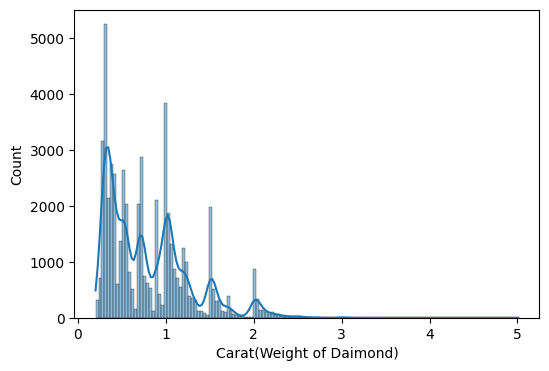

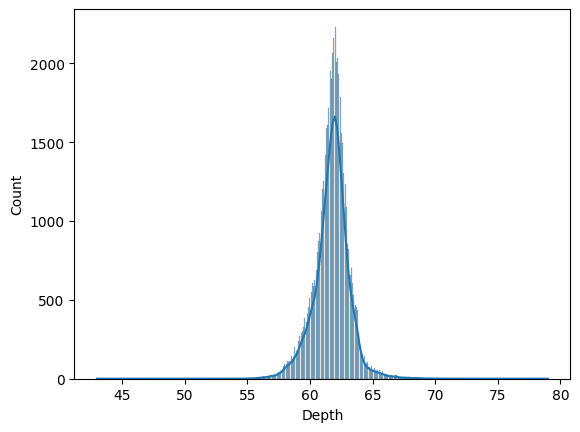

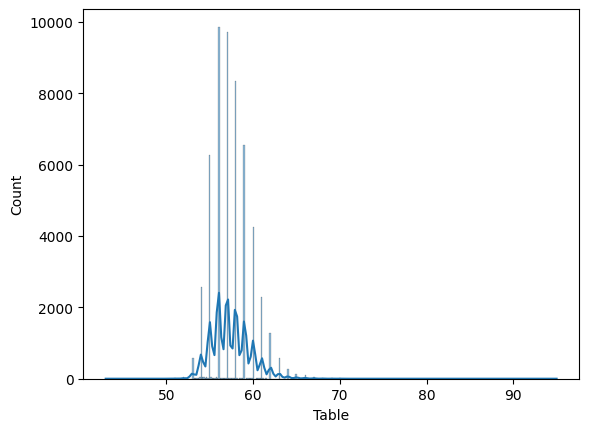

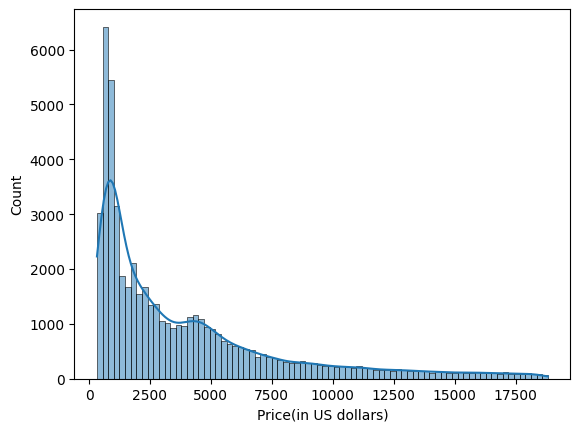

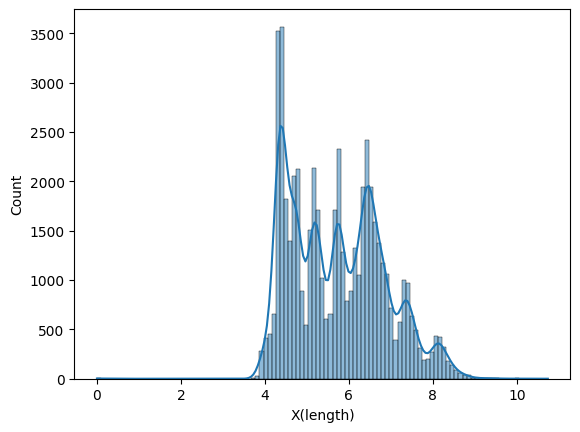

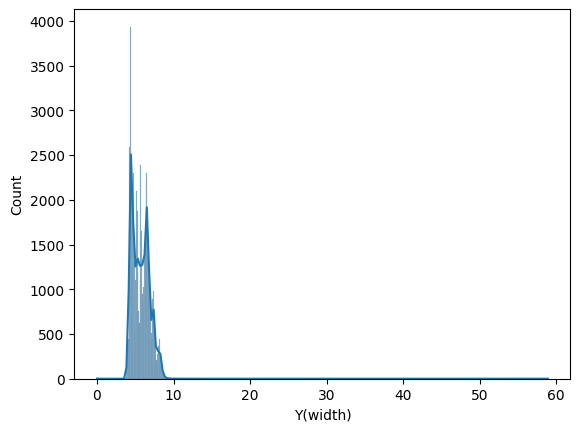

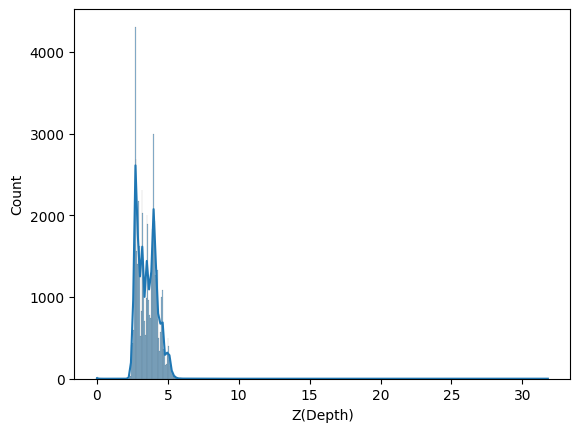

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data=df,x=col,kde=True)
    print("\n")
    plt.show()

### Statistical Analysis 
To understand about the each and every variables of the dataset

### Data Visualization
Univariate, bivariate and multivariate analysis

In [14]:
df1=df.copy()

In [15]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [16]:
df1["Cut(Quality)"]=df1["Cut(Quality)"].map(cut_map)
df1["Clarity"]=df1["Clarity"].map(clarity_map)
df1["Color"]=df1["Color"].map(color_map)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53794 non-null  float64
 1   Cut(Quality)              53794 non-null  int64  
 2   Color                     53794 non-null  int64  
 3   Clarity                   53794 non-null  int64  
 4   Depth                     53794 non-null  float64
 5   Table                     53794 non-null  float64
 6   Price(in US dollars)      53794 non-null  int64  
 7   X(length)                 53794 non-null  float64
 8   Y(width)                  53794 non-null  float64
 9   Z(Depth)                  53794 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


In [18]:
df1.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df1.rename(columns={'Carat(Weight of Daimond)':'Carat'}, inplace=True)
df1.rename(columns={'Cut(Quality)':'Cut'}, inplace=True)
df1.rename(columns={'Price(in US dollars)':'Price'}, inplace=True)

In [20]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [21]:
X=df1.drop(labels=["Price"],axis=1)
y=df1["Price"]

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
type(y)

pandas.core.series.Series

In [24]:
cat_cols=X.select_dtypes(include="object").columns
num_cols=X.select_dtypes(exclude="object").columns

In [25]:
cat_cols

Index([], dtype='object')

In [26]:
num_cols

Index(['Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'X(length)',
       'Y(width)', 'Z(Depth)'],
      dtype='object')

In [30]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [28]:
num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)

In [31]:
cat_pipeline=Pipeline(

    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))

    ]
)

In [32]:
preprocessor=ColumnTransformer(

    [
        ("num_pipeline",num_pipeline,num_cols),
        ("cat_pipeline",cat_pipeline,cat_cols)
    ]
)

### Data Leakage: 
To avoid data leakage train test split is performed.

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)

(37655, 9)
(16139, 9)


In [35]:
preprocessor.fit_transform(X_train)

array([[-1.04897737,  0.9849875 , -1.52336696, ..., -1.29191391,
        -1.26825412, -1.27751324],
       [ 0.4399331 ,  0.9849875 ,  0.23605343, ...,  0.6435208 ,
         0.61484203,  0.61518443],
       [ 0.4399331 ,  0.0884946 , -1.52336696, ...,  0.51034869,
         0.55266433,  0.5865072 ],
       ...,
       [-1.00703623,  0.9849875 ,  1.99547381, ..., -1.19425436,
        -1.1705463 , -1.17714291],
       [ 0.20925683,  0.0884946 ,  1.99547381, ...,  0.35054215,
         0.25954087,  0.40010515],
       [ 0.4399331 ,  0.0884946 ,  0.23605343, ...,  0.55473939,
         0.50825168,  0.61518443]])

In [36]:
preprocessor.transform(X_test)

array([[-0.189184  , -2.60098409,  1.99547381, ..., -0.09336489,
        -0.18458558,  0.11333278],
       [ 0.20925683, -0.8079983 , -0.93689349, ...,  0.35942029,
         0.3927788 ,  0.31407344],
       [-0.48277198,  0.9849875 ,  0.23605343, ..., -0.38634354,
        -0.36223616, -0.34550302],
       ...,
       [ 0.06246284,  0.9849875 ,  0.82252689, ...,  0.2528826 ,
         0.29507099,  0.27105758],
       [-0.189184  ,  0.0884946 , -0.93689349, ..., -0.00458348,
        -0.10464282,  0.02730107],
       [ 0.56575652,  0.0884946 , -1.52336696, ...,  0.75893663,
         0.68590226,  0.78724786]])

In [37]:
preprocessor.get_feature_names_out()

array(['num_pipeline__Carat', 'num_pipeline__Cut', 'num_pipeline__Color',
       'num_pipeline__Clarity', 'num_pipeline__Depth',
       'num_pipeline__Table', 'num_pipeline__X(length)',
       'num_pipeline__Y(width)', 'num_pipeline__Z(Depth)'], dtype=object)

In [38]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [40]:
X_train.head(2)

,num_pipeline__Carat,num_pipeline__Cut,num_pipeline__Color,num_pipeline__Clarity,num_pipeline__Depth,num_pipeline__Table,num_pipeline__X(length),num_pipeline__Y(width),num_pipeline__Z(Depth)
0,-1.048977,0.984987,-1.523367,-0.637953,-0.036723,-0.204891,-1.291914,-1.268254,-1.277513
1,0.439933,0.984987,0.236053,-0.028904,-0.106657,-0.652562,0.643521,0.614842,0.615184


### Model Training

In [41]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    'xgboost':XGBRegressor()

}

In [43]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [44]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [45]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost'])

In [46]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)

    return mae, mse,r2

In [47]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")


model training performance LinearRegression()
MSE: 1443415.0072298076
MAE: 798.474777228157
R2 SCORE: 0.9060114236219523


model training performance Lasso()
MSE: 1440392.0926993482
MAE: 799.3059071036377
R2 SCORE: 0.9062082619753069


model training performance Ridge()
MSE: 1443341.013641244
MAE: 798.5720856719369
R2 SCORE: 0.9060162417456488


model training performance ElasticNet()
MSE: 2637657.814276617
MAE: 1071.0002452772783
R2 SCORE: 0.8282478000474176


model training performance RandomForestRegressor()
MSE: 274829.23669015995
MAE: 263.0473473189759
R2 SCORE: 0.9821043784537422


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=No

In [48]:
r2_list

[0.9060114236219523,
 0.9062082619753069,
 0.9060162417456488,
 0.8282478000474176,
 0.9821043784537422,
 0.9820008322207625]